In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [2]:
df=pd.read_csv('listing_mortgage_info.csv')

In [3]:
df.head()

,zpid,bucketType,rate,rateSource,lastUpdatedTimestamp,lastUpdatedDate
0,34119484,30 Year Fixed Bucket,6.346,ZGMI,2024-11-29 06:07:07.7 UTC,2024-11-29
1,34119484,Arm 5 Bucket,6.727,ZGMI,2024-11-29 06:07:07.7 UTC,2024-11-29
2,34119484,15 Year Fixed Bucket,5.764,ZGMI,2024-11-29 06:07:07.7 UTC,2024-11-29
3,14513801,30 Year Fixed Bucket,6.396,ZGMI,2024-11-29 09:02:19.465 UTC,2024-11-29
4,14513801,15 Year Fixed Bucket,5.768,ZGMI,2024-11-29 09:02:19.465 UTC,2024-11-29


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98502 entries, 0 to 98501
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   zpid                  98502 non-null  int64  
 1   bucketType            98502 non-null  object 
 2   rate                  93667 non-null  float64
 3   rateSource            98502 non-null  object 
 4   lastUpdatedTimestamp  98502 non-null  object 
 5   lastUpdatedDate       98502 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.5+ MB


In [5]:
df.isnull().sum()

zpid                       0
bucketType                 0
rate                    4835
rateSource                 0
lastUpdatedTimestamp       0
lastUpdatedDate            0
dtype: int64

In [6]:
for col in df.columns:
    if df[col].isnull().sum()>0:
        if df[col].dtype=='object':
            df[col].fillna(df[col].mode()[0],inplace=True)
            
        else:
            df[col].fillna(df[col].mean(), inplace=True)

C:\Users\erniyazov_sarvarbek\AppData\Local\Temp\ipykernel_18964\3470745950.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


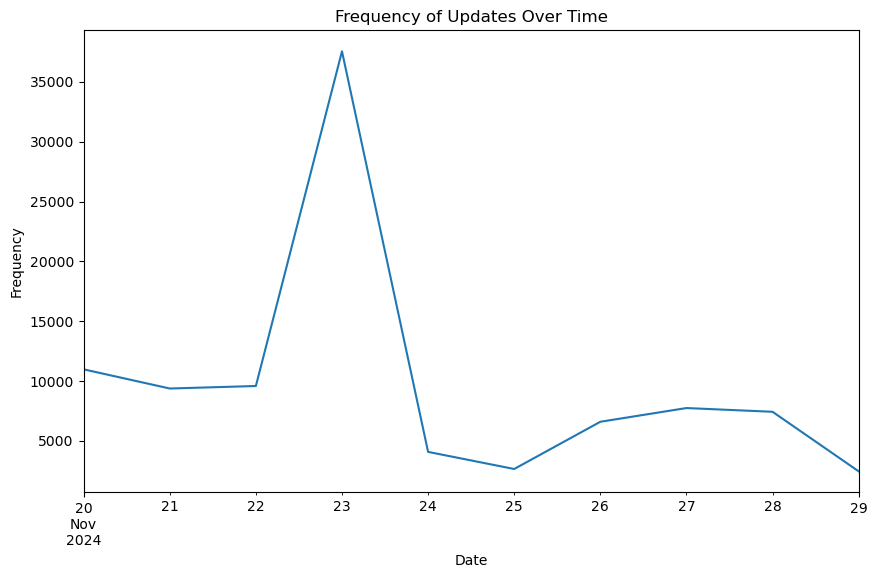

In [7]:
df['lastUpdatedDate'] = pd.to_datetime(df['lastUpdatedDate'])

# Plot time-series data
df['lastUpdatedDate'].value_counts().sort_index().plot(figsize=(10, 6))
plt.title('Frequency of Updates Over Time')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()


In [8]:
df['lastUpdatedTimestamp'] = df['lastUpdatedTimestamp'].str.replace(r'\s\(.+?\)', '', regex=True)

In [9]:
df['lastUpdatedTimestamp']

0          2024-11-29 06:07:07.7 UTC
1          2024-11-29 06:07:07.7 UTC
2          2024-11-29 06:07:07.7 UTC
3        2024-11-29 09:02:19.465 UTC
4        2024-11-29 09:02:19.465 UTC
                    ...             
98497    2024-11-29 05:14:52.233 UTC
98498    2024-11-29 05:15:10.685 UTC
98499    2024-11-29 05:15:11.965 UTC
98500     2024-11-29 03:54:50.25 UTC
98501    2024-11-29 03:00:16.122 UTC
Name: lastUpdatedTimestamp, Length: 98502, dtype: object

In [10]:
df['lastUpdatedTimestamp']=pd.to_datetime(df['lastUpdatedTimestamp'], errors='coerce')

In [11]:
df['lastUpdatedTimestamp']

0       2024-11-29 06:07:07.700000+00:00
1       2024-11-29 06:07:07.700000+00:00
2       2024-11-29 06:07:07.700000+00:00
3       2024-11-29 09:02:19.465000+00:00
4       2024-11-29 09:02:19.465000+00:00
                      ...               
98497   2024-11-29 05:14:52.233000+00:00
98498   2024-11-29 05:15:10.685000+00:00
98499   2024-11-29 05:15:11.965000+00:00
98500   2024-11-29 03:54:50.250000+00:00
98501   2024-11-29 03:00:16.122000+00:00
Name: lastUpdatedTimestamp, Length: 98502, dtype: datetime64[ns, UTC]

In [12]:
df['Year'] = df['lastUpdatedTimestamp'].dt.year
df['Month'] = df['lastUpdatedTimestamp'].dt.month
df['Day'] = df['lastUpdatedTimestamp'].dt.day
df['Hour'] = df['lastUpdatedTimestamp'].dt.hour
df['Minute'] = df['lastUpdatedTimestamp'].dt.minute
df['Second'] = df['lastUpdatedTimestamp'].dt.second

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98502 entries, 0 to 98501
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   zpid                  98502 non-null  int64              
 1   bucketType            98502 non-null  object             
 2   rate                  98502 non-null  float64            
 3   rateSource            98502 non-null  object             
 4   lastUpdatedTimestamp  98424 non-null  datetime64[ns, UTC]
 5   lastUpdatedDate       98502 non-null  datetime64[ns]     
 6   Year                  98424 non-null  float64            
 7   Month                 98424 non-null  float64            
 8   Day                   98424 non-null  float64            
 9   Hour                  98424 non-null  float64            
 10  Minute                98424 non-null  float64            
 11  Second                98424 non-null  float64            
dtypes: d

In [14]:
df.drop('lastUpdatedTimestamp', axis=1, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98502 entries, 0 to 98501
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   zpid             98502 non-null  int64         
 1   bucketType       98502 non-null  object        
 2   rate             98502 non-null  float64       
 3   rateSource       98502 non-null  object        
 4   lastUpdatedDate  98502 non-null  datetime64[ns]
 5   Year             98424 non-null  float64       
 6   Month            98424 non-null  float64       
 7   Day              98424 non-null  float64       
 8   Hour             98424 non-null  float64       
 9   Minute           98424 non-null  float64       
 10  Second           98424 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(2)
memory usage: 8.3+ MB


In [16]:
df.head()

,zpid,bucketType,rate,rateSource,lastUpdatedDate,Year,Month,Day,Hour,Minute,Second
0,34119484,30 Year Fixed Bucket,6.346,ZGMI,2024-11-29,2024.0,11.0,29.0,6.0,7.0,7.0
1,34119484,Arm 5 Bucket,6.727,ZGMI,2024-11-29,2024.0,11.0,29.0,6.0,7.0,7.0
2,34119484,15 Year Fixed Bucket,5.764,ZGMI,2024-11-29,2024.0,11.0,29.0,6.0,7.0,7.0
3,14513801,30 Year Fixed Bucket,6.396,ZGMI,2024-11-29,2024.0,11.0,29.0,9.0,2.0,19.0
4,14513801,15 Year Fixed Bucket,5.768,ZGMI,2024-11-29,2024.0,11.0,29.0,9.0,2.0,19.0


In [17]:
categorical_col=df.select_dtypes(include=['object', 'category']).columns
categorical_col


Index(['bucketType', 'rateSource'], dtype='object')

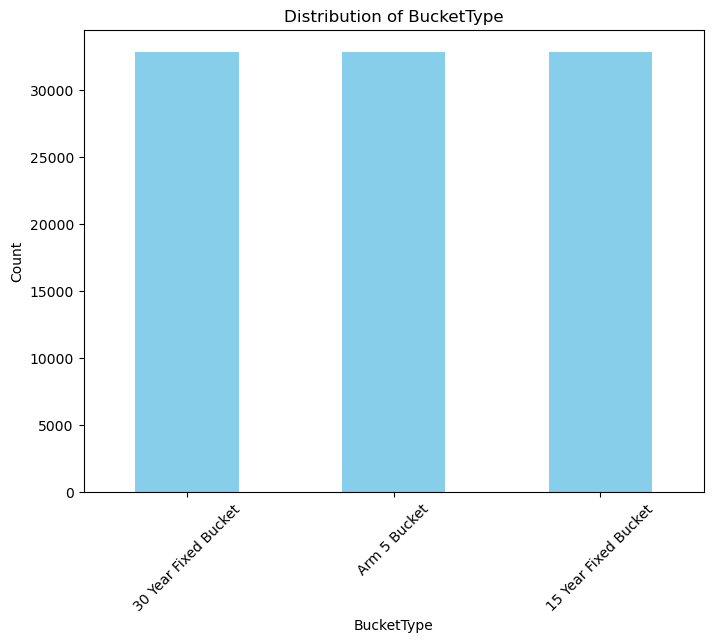

In [18]:
df['bucketType'].value_counts().plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Distribution of BucketType')
plt.xlabel('BucketType')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [19]:
cardinality = df[categorical_col].nunique()
cardinality

bucketType    3
rateSource    1
dtype: int64

In [20]:
df['bucketType'].value_counts()

bucketType
30 Year Fixed Bucket    32834
Arm 5 Bucket            32834
15 Year Fixed Bucket    32834
Name: count, dtype: int64

In [21]:
df['bucketType'].head(5)

0    30 Year Fixed Bucket
1            Arm 5 Bucket
2    15 Year Fixed Bucket
3    30 Year Fixed Bucket
4    15 Year Fixed Bucket
Name: bucketType, dtype: object

In [22]:
df['bucketType'].unique()

array(['30 Year Fixed Bucket', 'Arm 5 Bucket', '15 Year Fixed Bucket'],
      dtype=object)

In [23]:
df['bucketType']=df['bucketType'].map({'30 Year Fixed Bucket':1, 'Arm 5 Bucket':2,'15 Year Fixed Buckett':3})

In [24]:
df['rateSource']=df['rateSource'].map({'ZGMI':1})

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98502 entries, 0 to 98501
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   zpid             98502 non-null  int64         
 1   bucketType       65668 non-null  float64       
 2   rate             98502 non-null  float64       
 3   rateSource       98502 non-null  int64         
 4   lastUpdatedDate  98502 non-null  datetime64[ns]
 5   Year             98424 non-null  float64       
 6   Month            98424 non-null  float64       
 7   Day              98424 non-null  float64       
 8   Hour             98424 non-null  float64       
 9   Minute           98424 non-null  float64       
 10  Second           98424 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(2)
memory usage: 8.3 MB


In [26]:
df['lastUpdatedDate']=pd.to_datetime(df['lastUpdatedDate'], errors='coerce')

In [27]:
df['Year_last'] = df['lastUpdatedDate'].dt.year
df['Month_last'] = df['lastUpdatedDate'].dt.month
df['Day_last'] = df['lastUpdatedDate'].dt.day
df.drop('lastUpdatedDate', axis=1, inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98502 entries, 0 to 98501
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   zpid        98502 non-null  int64  
 1   bucketType  65668 non-null  float64
 2   rate        98502 non-null  float64
 3   rateSource  98502 non-null  int64  
 4   Year        98424 non-null  float64
 5   Month       98424 non-null  float64
 6   Day         98424 non-null  float64
 7   Hour        98424 non-null  float64
 8   Minute      98424 non-null  float64
 9   Second      98424 non-null  float64
 10  Year_last   98502 non-null  int32  
 11  Month_last  98502 non-null  int32  
 12  Day_last    98502 non-null  int32  
dtypes: float64(8), int32(3), int64(2)
memory usage: 8.6 MB


In [29]:
df.isnull().sum()

zpid              0
bucketType    32834
rate              0
rateSource        0
Year             78
Month            78
Day              78
Hour             78
Minute           78
Second           78
Year_last         0
Month_last        0
Day_last          0
dtype: int64

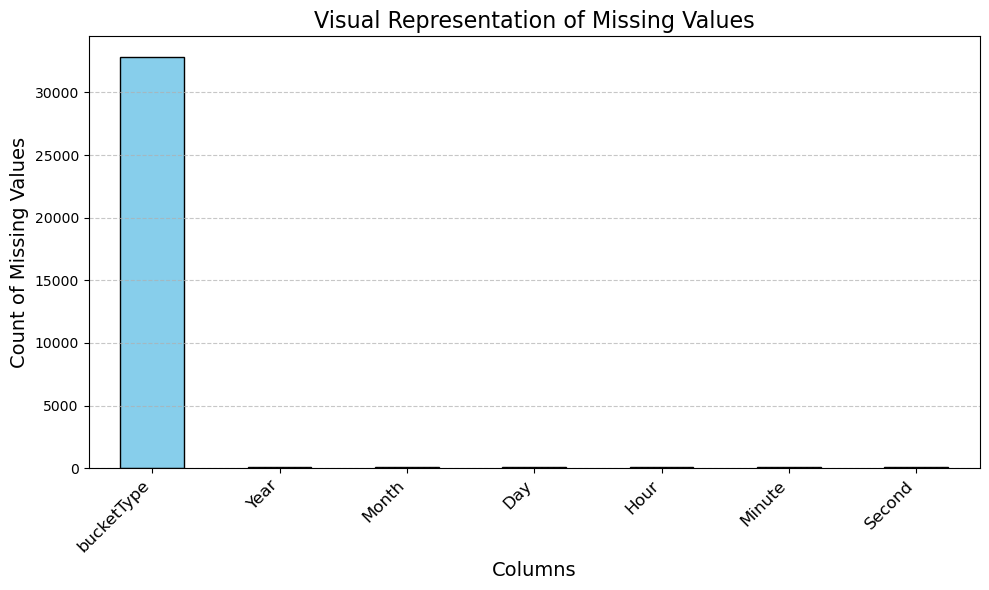

In [30]:
import matplotlib.pyplot as plt

# Calculate the number of missing values per column
missing_counts = df.isnull().sum()

# Filter columns with missing values and sort them in descending order
missing_counts_filtered = missing_counts[missing_counts > 0].sort_values(ascending=False)

# Plot the missing values
plt.figure(figsize=(10, 6))  # Set figure size
missing_counts_filtered.plot(kind='bar', color='skyblue', edgecolor='black')

# Add plot title and axis labels with improved text clarity
plt.title('Visual Representation of Missing Values', fontsize=16)
plt.ylabel('Count of Missing Values', fontsize=14)
plt.xlabel('Columns', fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add a grid for easier value estimation
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout for better fitting
plt.show()


In [31]:
df['Year'].unique()

array([2024.,   nan])

In [32]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object' or df[col].dtype.name == 'category':
            # Fill categorical columns with the first mode
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            # Fill numerical columns with mean
            df[col].fillna(df[col].mean(), inplace=True)


C:\Users\erniyazov_sarvarbek\AppData\Local\Temp\ipykernel_18964\1540328968.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [33]:
df.isnull().sum()

zpid          0
bucketType    0
rate          0
rateSource    0
Year          0
Month         0
Day           0
Hour          0
Minute        0
Second        0
Year_last     0
Month_last    0
Day_last      0
dtype: int64

In [34]:
X = df.drop(columns=['rate'])  
y = df['rate'] 

In [35]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)


X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [36]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [37]:
y_pred_lr=lr.predict(X_test)
mse_lr=mean_squared_error(y_test,y_pred_lr)
r2_lr=r2_score(y_test,y_pred_lr)
print(mse_lr)
print(r2_lr)

0.15270637119837444
0.0733653725334702


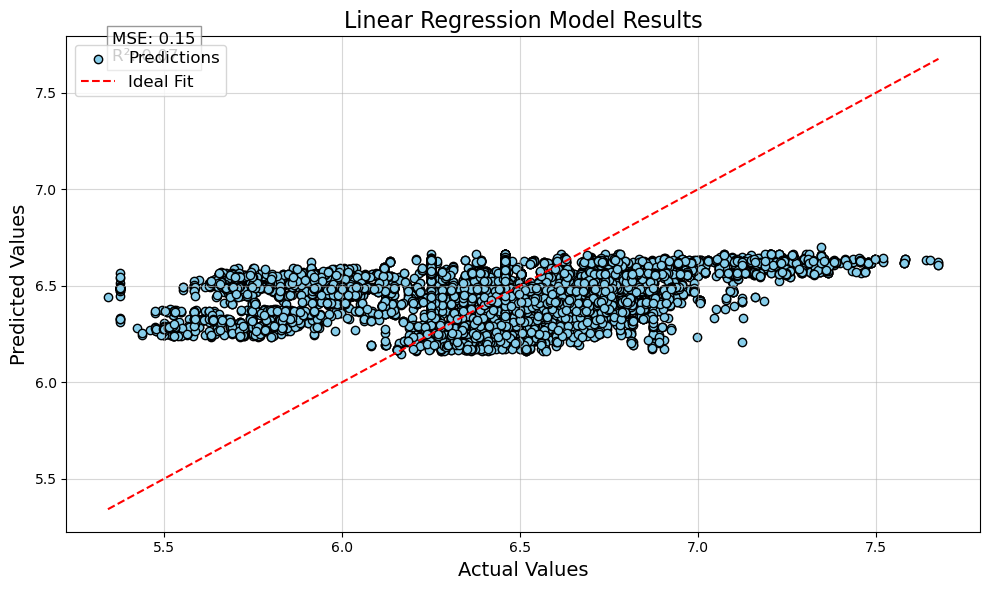

In [38]:
 #Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='skyblue', edgecolor='black', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')

# Add title and labels
plt.title('Linear Regression Model Results', fontsize=16)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.legend(fontsize=12)

# Add annotations for metrics
plt.text(0.05, 0.95, f"MSE: {mse_lr:.2f}\nR²: {r2_lr:.2f}", 
         transform=plt.gca().transAxes, fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Add grid for better readability
plt.grid(alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

In [39]:
#scaled
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
X_val_scaled=scaler.transform(X_val)

In [40]:
#scaling
lr=LinearRegression()
lr.fit(X_train_scaled,y_train)
y_pred_lr=lr.predict(X_test_scaled)
mse_lr=mean_squared_error(y_test,y_pred_lr)
r2_lr=r2_score(y_test,y_pred_lr)
print(mse_lr)
print(r2_lr)

0.1527063711983744
0.07336537253347042


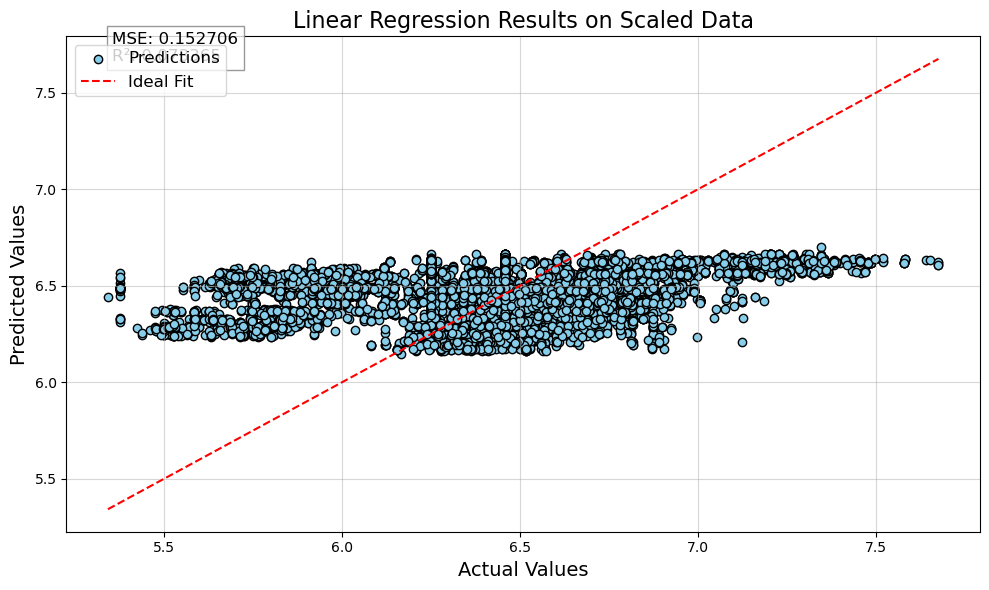

In [41]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='skyblue', edgecolor='black', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')

# Add title and labels
plt.title('Linear Regression Results on Scaled Data', fontsize=16)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.legend(fontsize=12)

# Add metrics as text annotation
plt.text(0.05, 0.95, f"MSE: {mse_lr:.6f}\nR²: {r2_lr:.6f}", 
         transform=plt.gca().transAxes, fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Add grid for better readability
plt.grid(alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

In [42]:
dt=DecisionTreeRegressor(random_state=42)
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)
mse_dt=mean_squared_error(y_test,y_pred_dt)
r2_dt=r2_score(y_test,y_pred_dt)
print(mse_dt)
print(r2_dt)

0.07919254425562731
0.5194532279919631


In [43]:
#scaled
dt=DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled,y_train)
y_pred_dt=dt.predict(X_test_scaled)
mse_dt=mean_squared_error(y_test,y_pred_dt)
r2_dt=r2_score(y_test,y_pred_dt)
print(mse_dt)
print(r2_dt)

0.080233244952956
0.5131381718786816


In [44]:
rf=RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)
mse_rf=mean_squared_error(y_test,y_pred_rf)
r2_rf=r2_score(y_test,y_pred_rf)
print(mse_rf)
print(r2_rf)

0.044605443937920645
0.7293305537808872


In [45]:
#scaled
rf=RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled,y_train)
y_pred_rf=rf.predict(X_test_scaled)
mse_rf=mean_squared_error(y_test,y_pred_rf)
r2_rf=r2_score(y_test,y_pred_rf)
print(mse_rf)
print(r2_rf)

0.04456385629320828
0.7295829109770071


Unscaled KNN MSE: 0.16612148503623214
Unscaled KNN R2: -0.008038624667248362
Scaled KNN MSE: 0.07628667791979052
Scaled KNN R2: 0.5370862602514863


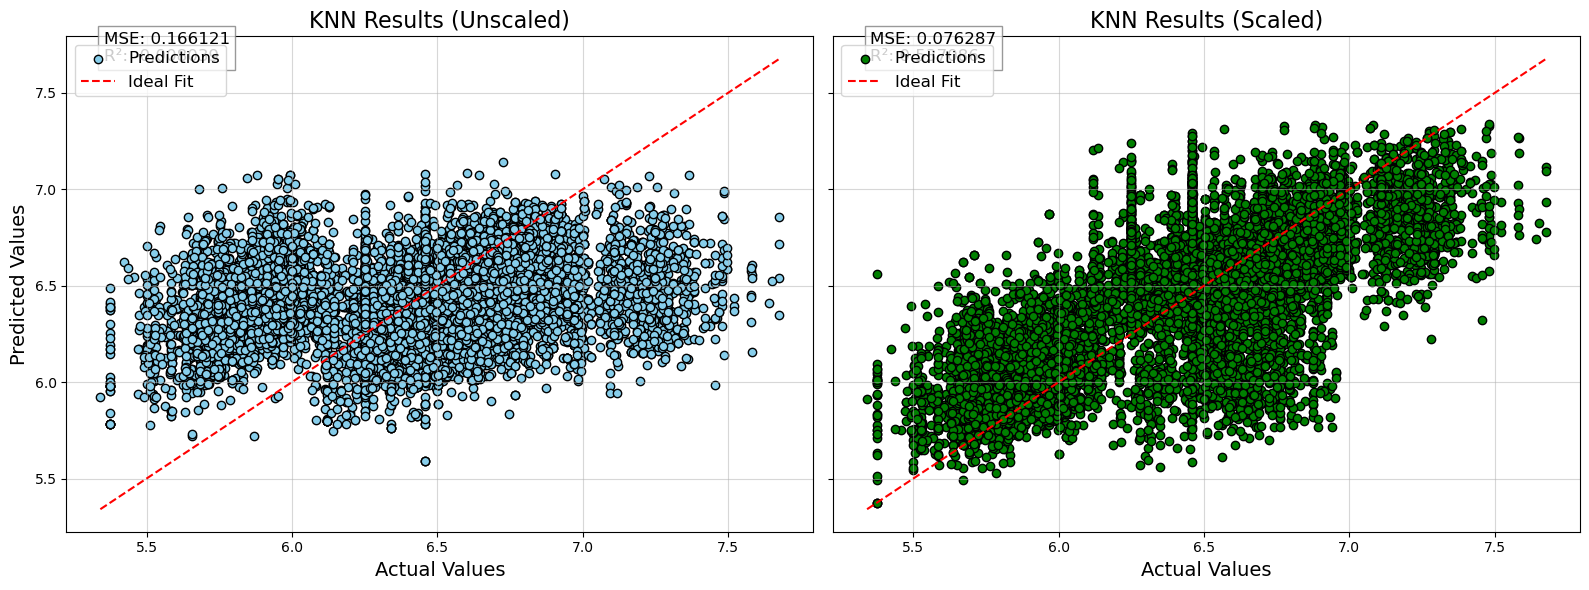

In [46]:
# Unscaled KNN Model
knn_unscaled = KNeighborsRegressor()
knn_unscaled.fit(X_train, y_train)
y_pred_knn_unscaled = knn_unscaled.predict(X_test)
mse_knn_unscaled = mean_squared_error(y_test, y_pred_knn_unscaled)
r2_knn_unscaled = r2_score(y_test, y_pred_knn_unscaled)

# Scaled KNN Model
knn_scaled = KNeighborsRegressor()
knn_scaled.fit(X_train_scaled, y_train)
y_pred_knn_scaled = knn_scaled.predict(X_test_scaled)
mse_knn_scaled = mean_squared_error(y_test, y_pred_knn_scaled)
r2_knn_scaled = r2_score(y_test, y_pred_knn_scaled)

# Print Metrics
print("Unscaled KNN MSE:", mse_knn_unscaled)
print("Unscaled KNN R2:", r2_knn_unscaled)
print("Scaled KNN MSE:", mse_knn_scaled)
print("Scaled KNN R2:", r2_knn_scaled)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Unscaled Plot
axes[0].scatter(y_test, y_pred_knn_unscaled, color='skyblue', edgecolor='black', label='Predictions')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
axes[0].set_title('KNN Results (Unscaled)', fontsize=16)
axes[0].set_xlabel('Actual Values', fontsize=14)
axes[0].set_ylabel('Predicted Values', fontsize=14)
axes[0].legend(fontsize=12)
axes[0].grid(alpha=0.5)
axes[0].text(0.05, 0.95, f"MSE: {mse_knn_unscaled:.6f}\nR²: {r2_knn_unscaled:.6f}",
             transform=axes[0].transAxes, fontsize=12, 
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Scaled Plot
axes[1].scatter(y_test, y_pred_knn_scaled, color='green', edgecolor='black', label='Predictions')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
axes[1].set_title('KNN Results (Scaled)', fontsize=16)
axes[1].set_xlabel('Actual Values', fontsize=14)
axes[1].legend(fontsize=12)
axes[1].grid(alpha=0.5)
axes[1].text(0.05, 0.95, f"MSE: {mse_knn_scaled:.6f}\nR²: {r2_knn_scaled:.6f}",
             transform=axes[1].transAxes, fontsize=12, 
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [47]:
df.head()

,zpid,bucketType,rate,rateSource,Year,Month,Day,Hour,Minute,Second,Year_last,Month_last,Day_last
0,34119484,1.0,6.346,1,2024.0,11.0,29.0,6.0,7.0,7.0,2024,11,29
1,34119484,2.0,6.727,1,2024.0,11.0,29.0,6.0,7.0,7.0,2024,11,29
2,34119484,1.5,5.764,1,2024.0,11.0,29.0,6.0,7.0,7.0,2024,11,29
3,14513801,1.0,6.396,1,2024.0,11.0,29.0,9.0,2.0,19.0,2024,11,29
4,14513801,1.5,5.768,1,2024.0,11.0,29.0,9.0,2.0,19.0,2024,11,29


<Axes: >

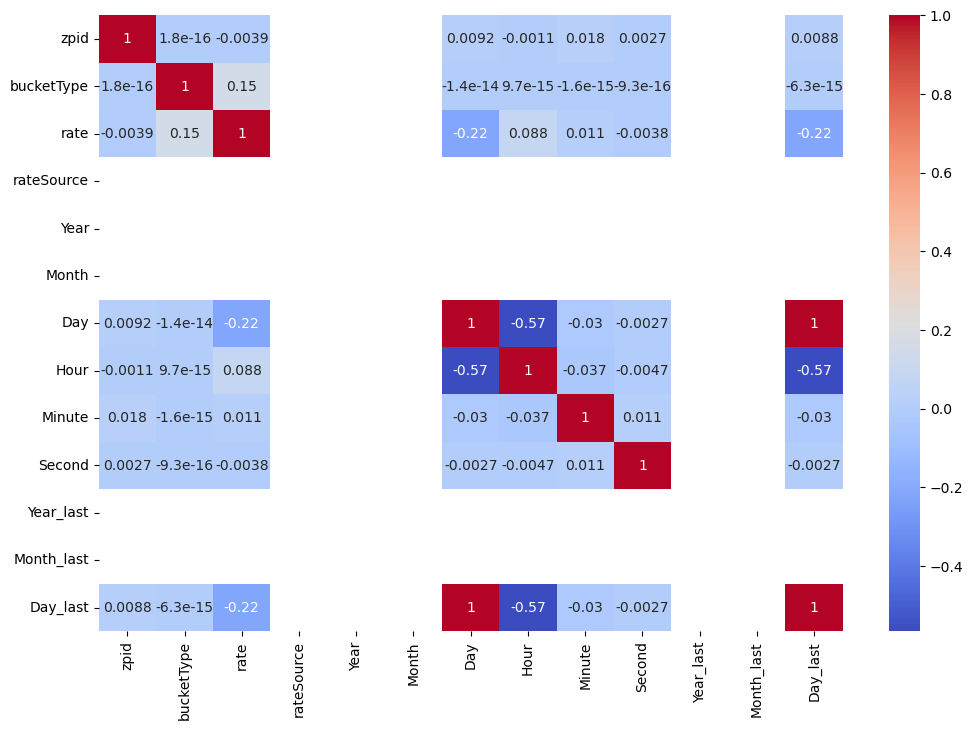

In [48]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


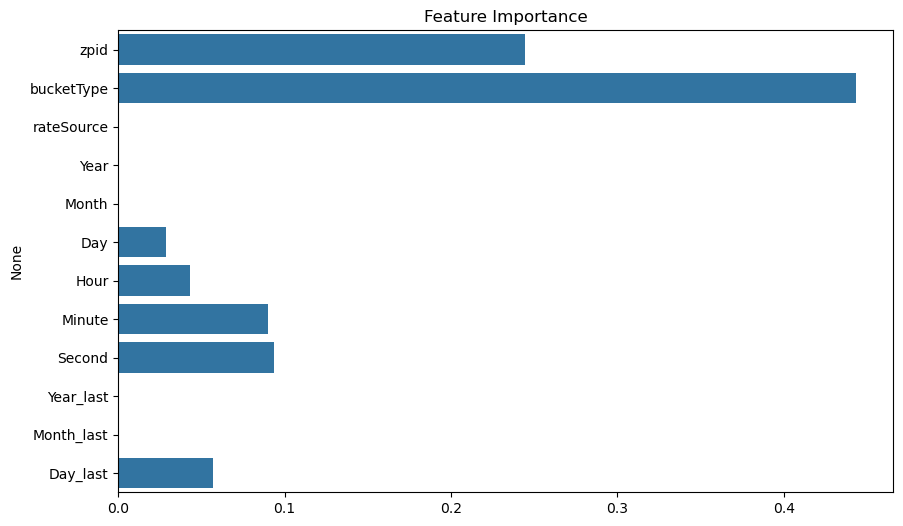

In [49]:
from sklearn.ensemble import RandomForestRegressor

# Example (assuming 'rate' is your target)
X = df.drop(columns=['rate'])  # Features
y = df['rate']  # Target

# Train a Random Forest
model = RandomForestRegressor()
model.fit(X, y)

# Plot feature importance
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance")
plt.show()


<Axes: title={'center': 'Mutual Information of Features'}>

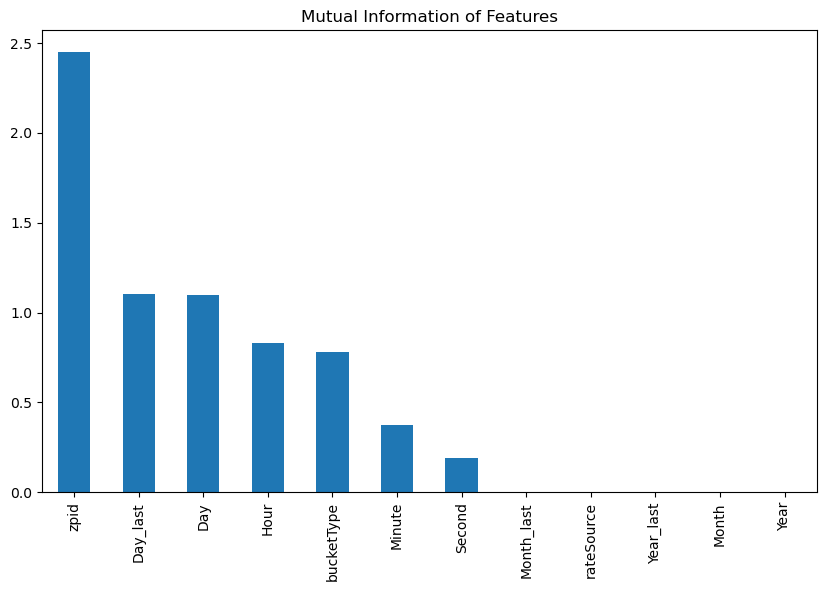

In [50]:
from sklearn.feature_selection import mutual_info_regression

X = df.drop(columns=['rate'])
y = df['rate']

mutual_info = mutual_info_regression(X, y)
mutual_info_series = pd.Series(mutual_info, index=X.columns)

# Plot
mutual_info_series.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), title="Mutual Information of Features")


<Axes: title={'center': 'RFE Feature Rankings'}>

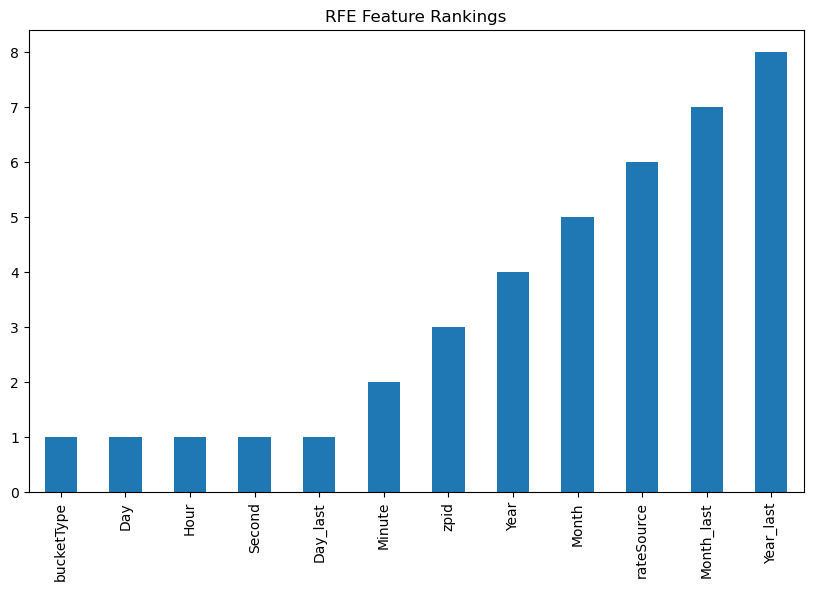

In [51]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

X = df.drop(columns=['rate'])
y = df['rate']

# Use RFE with a model
model = LinearRegression()
rfe = RFE(model, n_features_to_select=5)  # Select top 5 features
rfe.fit(X, y)

# Check ranking
rfe_features = pd.Series(rfe.ranking_, index=X.columns)
rfe_features.sort_values().plot(kind='bar', figsize=(10, 6), title="RFE Feature Rankings")
